## Download poster images from json file

Below is the code used to download movie posters. It takes about 2 hr to download all the posters.

In [1]:
import json
with open('imdb_output.json', 'r') as f:
    out = json.load(f)

In [73]:
from bs4 import BeautifulSoup
import requests
import re
import urllib
import os
import numpy as np
import PIL
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [75]:
from IPython.display import Image
from IPython.core.display import HTML 
#Image("./image/1.jpg", width = 200, height = 400)


## Convert color into rgb values

After extracting the major colors, we converted the color into rgb values and checked the correlation between rgb values and the movie imdb scores.

In [4]:
from PIL import Image
from collections import namedtuple
from math import sqrt
import random
from matplotlib import patches

In [50]:
rgb = pd.read_csv('kmeans_color.csv')
meta = pd.read_csv('movie_metadata.csv')

In [32]:
## change hex to rgb
import matplotlib.colors as colors
colors.hex2color(rgb.iloc[0,1])

(0.23137254901960785, 0.2627450980392157, 0.3686274509803922)

In [69]:
cluster1_rgb = pd.DataFrame([colors.hex2color(rgb.iloc[i, 0]) for i in range(len(rgb))])
cluster2_rgb = pd.DataFrame([colors.hex2color(rgb.iloc[i, 1]) for i in range(len(rgb))])
cluster3_rgb = pd.DataFrame([colors.hex2color(rgb.iloc[i, 2]) for i in range(len(rgb))])

In [28]:
#del rgb

In [70]:
cluster_rgb = pd.concat([pd.DataFrame(meta.imdb_score), \
                          cluster1_rgb, \
                         cluster2_rgb, \
                          cluster3_rgb], \
                         axis=1, ignore_index=True)

In [71]:
del cluster1_rgb, cluster2_rgb, cluster3_rgb

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.003573,-0.004316,-0.018401,-0.023696,-0.014035,-0.024739,-0.023805,-0.033537,-0.055326
1,0.003573,1.000000,0.887796,0.741266,-0.124915,-0.164089,-0.156418,-0.124908,-0.170660,-0.169074
2,-0.004316,0.887796,1.000000,0.922920,-0.173316,-0.177294,-0.149512,-0.173284,-0.181195,-0.164904
3,-0.018401,0.741266,0.922920,1.000000,-0.170300,-0.161886,-0.104154,-0.170814,-0.163484,-0.115671
4,-0.023696,-0.124915,-0.173316,-0.170300,1.000000,0.906417,0.762988,-0.122335,-0.167789,-0.156197
5,-0.014035,-0.164089,-0.177294,-0.161886,0.906417,1.000000,0.920806,-0.177603,-0.187081,-0.159340
6,-0.024739,-0.156418,-0.149512,-0.104154,0.762988,0.920806,1.000000,-0.177942,-0.172997,-0.116821
7,-0.023805,-0.124908,-0.173284,-0.170814,-0.122335,-0.177603,-0.177942,1.000000,0.887997,0.743168
8,-0.033537,-0.170660,-0.181195,-0.163484,-0.167789,-0.187081,-0.172997,0.887997,1.000000,0.922890
9,-0.055326,-0.169074,-0.164904,-0.115671,-0.156197,-0.159340,-0.116821,0.743168,0.922890,1.000000


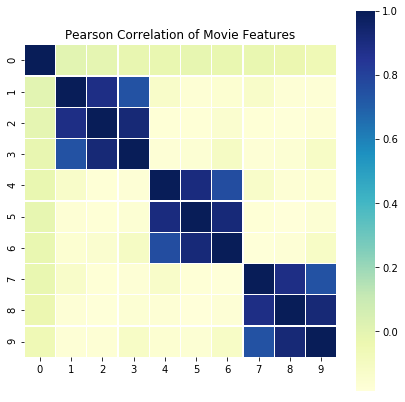

In [77]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(cluster_rgb.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu")
cluster_rgb.astype(float).corr()

We see that the rgb values are highly correlated within each cluster, but they do not have very good correlation with imdb scores. According to [this post](http://rstudio-pubs-static.s3.amazonaws.com/155921_d1b0d531118d46839a747b7c8b90e08b.html), the k-means clustered color might be related to the genere but not necessarily the imdb score. 